<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>  

# Learning Objectives

Towards the end of this lesson, you should be able to:
- apply different techniques to normalize data in Python
- discretize continuous values to categorical
- aggregate columns of numerical data
- handle imbalanced data using SMOTE
- identify redundant attributes for data reduction
- experiment with PCA for regression

In [107]:
import pandas as pd
import numpy as np
#from sklearn import datasets

---

### For Google Colab Use Only
Skip this section if you are using Jupyter Notebook etc.

In [108]:
# from google.colab import drive
# drive.mount('/content/drive')

In [109]:
# drive_path = '/content/drive/MyDrive/Trimester/2310/TDS3301/Tutorials/Tutorial 4/' #set your google drive path

---
# Data Transformation

Data transformation is the process of converting data into another (usable) format to support analysis and mining.

## Normalization and Standardization

One of the most used data transformation method is data normalization for numercal data. Among the most common techniques are:
- Min-max normalization: Transform data values to the range of [0,1]
- Z-score normalization (a.k.a. Standardization): transform data such that the mean is 0 and standard deviation 1.

Both of these normalization methods are readility available in the scikit-learn package. Let's give them a try.

In [110]:
from sklearn.preprocessing import StandardScaler  # z-score / standardization
from sklearn.preprocessing import MinMaxScaler # min max

In [111]:
# toy data for testing
df = pd.DataFrame({"height_cm": [180,165,170,164,161,183], "weight_kgs": [60,50,43,46,55,76]})
df["height_ft"] = df["height_cm"]*0.0328084
display(df)

,height_cm,weight_kgs,height_ft
0,180,60,5.905512
1,165,50,5.413386
2,170,43,5.577428
3,164,46,5.380578
4,161,55,5.282152
5,183,76,6.003937


Try the `MinMaxScaler`:

In [112]:
# Min Max
features_to_scale = ["height_cm", "weight_kgs", "height_ft"]
to_scale = df[features_to_scale]

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(to_scale)
x_scaled = pd.DataFrame(x_scaled, columns = features_to_scale)
display(x_scaled)

,height_cm,weight_kgs,height_ft
0,0.863636,0.515152,0.863636
1,0.181818,0.212121,0.181818
2,0.409091,0.000000,0.409091
3,0.136364,0.090909,0.136364
4,0.000000,0.363636,0.000000
5,1.000000,1.000000,1.000000


Exercise: Reimplement the min-max normalization manually using `min()` and `max()`.


In [113]:
df1 = df.copy()

features_to_scale = ["height_cm", "weight_kgs", "height_ft"]
to_scale = df1[features_to_scale]

for feature in features_to_scale:
    min_value = to_scale[feature].min()
    max_value = to_scale[feature].max()
    to_scale[feature] = (to_scale[feature] - min_value / (max_value - min_value))


display(df1)

,height_cm,weight_kgs,height_ft
0,180,60,5.905512
1,165,50,5.413386
2,170,43,5.577428
3,164,46,5.380578
4,161,55,5.282152
5,183,76,6.003937


Next, try Z-Score normalization by using the `StandardScaler()`

In [114]:
# Z-Score
features_to_scale = ["height_cm", "weight_kgs", "height_ft"]
to_scale = df[features_to_scale]

standard_scaler = StandardScaler()
x_scaled = standard_scaler.fit_transform(to_scale)
x_scaled = pd.DataFrame(x_scaled, columns = features_to_scale)
display(x_scaled)

,height_cm,weight_kgs,height_ft
0,1.149932,0.457709,1.149932
1,-0.665750,-0.457709,-0.665750
2,-0.060523,-1.098501,-0.060523
3,-0.786796,-0.823876,-0.786796
4,-1.149932,0.000000,-1.149932
5,1.513069,1.922376,1.513069


Exercise: Reimplement the Z-score normalization manually using `mean()` and `std()`.


In [115]:
df2 = df.copy()

#Enter your codes here
features_to_scale = ['height_cm','weight_kgs','height_ft']
to_scale = df[features_to_scale]
for i in features_to_scale:
    to_scale[i] = (toscale[i] - to_scale[i].mean())/to_scale[i].std()
df2[features_to_scale] = to_scale

display(df2)

,height_cm,weight_kgs,height_ft
0,1.049740,0.417829,1.049740
1,-0.607744,-0.417829,-0.607744
2,-0.055249,-1.002789,-0.055249
3,-0.718243,-0.752092,-0.718243
4,-1.049740,0.000000,-1.049740
5,1.381237,1.754881,1.381237


Note: To transform the normalized data back to the original data, use `inverse_transform()`

### Exercise
Using the `train` set of the BigMartSales dataset, normalize all the numerical attributes.

In [116]:
#Enter your codes here

#Step 1: Read dataset
#Step 2: Drop missing values
#Step 3: Extract out numerical attributes
#Step 4: Apply normalization on the attributes
#Step 5: Show the new value

train_df = pd.read_csv('BigMartSales/train.csv')
train_df.dropna(inplace=True)
train_df_num = train_df.select_dtypes(include='float64')
to_scale = train_df[train_df_num.columns]

min_max_scaler = MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(to_scale)
x_scaled_train = pd.DataFrame(x_scaled_train, columns = train_df_num.columns)
display(x_scaled_train)


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.282525,0.085212,0.927446,0.359846
1,0.081274,0.102368,0.071280,0.036730
2,0.770765,0.088997,0.467837,0.199072
3,0.260494,0.000000,0.095036,0.090844
4,0.347723,0.000000,0.084583,0.047840
...,...,...,...,...
4645,0.964275,0.443954,0.625925,0.347428
4646,0.137541,0.301522,0.777541,0.265930
4647,0.359929,0.186840,0.227837,0.110320
4648,0.158083,0.771127,0.304349,0.174368


## Discretization

Discretization transforms continous data values into finite set of values (categories, discrete numerical, etc.). This type of transformation can be used for data reduction, or to simplify the data representation for easier knowledge interpretation. Discretization process can be applied on various kinds of numerical data.

Try the following codes to discretize the time of data into labels:

In [117]:
#create a sample timestamp by hour frequency
timestamp = pd.date_range("2020-06-22 05:00:00", "2020-06-22 23:59:59", freq='H')
display(timestamp)

DatetimeIndex(['2020-06-22 05:00:00', '2020-06-22 06:00:00',
               '2020-06-22 07:00:00', '2020-06-22 08:00:00',
               '2020-06-22 09:00:00', '2020-06-22 10:00:00',
               '2020-06-22 11:00:00', '2020-06-22 12:00:00',
               '2020-06-22 13:00:00', '2020-06-22 14:00:00',
               '2020-06-22 15:00:00', '2020-06-22 16:00:00',
               '2020-06-22 17:00:00', '2020-06-22 18:00:00',
               '2020-06-22 19:00:00', '2020-06-22 20:00:00',
               '2020-06-22 21:00:00', '2020-06-22 22:00:00',
               '2020-06-22 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [118]:
#convert the timestamp into a structured data frame. Note how the data and hour are accessed for data_time
df = pd.DataFrame({"timestamp":timestamp, "date":timestamp.date, "hour_of_day":timestamp.hour})
display(df)

,timestamp,date,hour_of_day
0,2020-06-22 05:00:00,2020-06-22,5
1,2020-06-22 06:00:00,2020-06-22,6
2,2020-06-22 07:00:00,2020-06-22,7
3,2020-06-22 08:00:00,2020-06-22,8
4,2020-06-22 09:00:00,2020-06-22,9
5,2020-06-22 10:00:00,2020-06-22,10
6,2020-06-22 11:00:00,2020-06-22,11
7,2020-06-22 12:00:00,2020-06-22,12
8,2020-06-22 13:00:00,2020-06-22,13
9,2020-06-22 14:00:00,2020-06-22,14


In [119]:
# Using the cut function to discretize the hour of day into 3 values
# To create 3 values / bins, need 4 intervals for the "bins" parameter
df["parts_of_day"] = pd.cut(df["hour_of_day"], bins=[-1,11,17,23], labels=["Morning", "Afternoon", "Evening"])
df.head(10)

,timestamp,date,hour_of_day,parts_of_day
0,2020-06-22 05:00:00,2020-06-22,5,Morning
1,2020-06-22 06:00:00,2020-06-22,6,Morning
2,2020-06-22 07:00:00,2020-06-22,7,Morning
3,2020-06-22 08:00:00,2020-06-22,8,Morning
4,2020-06-22 09:00:00,2020-06-22,9,Morning
5,2020-06-22 10:00:00,2020-06-22,10,Morning
6,2020-06-22 11:00:00,2020-06-22,11,Morning
7,2020-06-22 12:00:00,2020-06-22,12,Afternoon
8,2020-06-22 13:00:00,2020-06-22,13,Afternoon
9,2020-06-22 14:00:00,2020-06-22,14,Afternoon


Another example, we can discretize income groups via a mapping function:

In [120]:
income = pd.Series([3000,4000,3400,5900,4500, 10000, 4900, 12000])
display(income)

0     3000
1     4000
2     3400
3     5900
4     4500
5    10000
6     4900
7    12000
dtype: int64

In [121]:
income_group = income.map(lambda x: "high" if x > 5000 else "low")
display(income_group)

0     low
1     low
2     low
3    high
4     low
5    high
6     low
7    high
dtype: object

In [122]:
#put together into a single dataframe for comparison
pd.DataFrame({"income": income, "income_group": income_group})

,income,income_group
0,3000,low
1,4000,low
2,3400,low
3,5900,high
4,4500,low
5,10000,high
6,4900,low
7,12000,high


We may also use such discretization on datasets to create concept hierarchies.

## Data Aggregation

Often, we would also need to process and aggregate (numerical) data into a summarized form to support statistical analysis. In `Pandas`, one of the useful functions for data aggregation is `groupby`, which allows the dataset to be view from various perspectives.

Try out the following example:

In [123]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.random_sample(8)*1000,
                   'D': np.random.random_sample(8)*100})
display(df)

,A,B,C,D
0,foo,one,194.668463,69.411407
1,bar,one,860.353926,31.499979
2,foo,two,6.863123,74.572913
3,bar,three,456.600145,91.360919
4,foo,two,231.611507,65.499402
5,bar,two,711.418757,17.154238
6,foo,one,10.770196,94.858461
7,foo,three,283.383845,86.444375


In [124]:
# Group by category A, aggregate C and D by mean
df.groupby("A").mean(numeric_only=True)

,C,D
A,,
bar,676.124276,46.671712
foo,145.459427,78.157312


In [125]:
# Group by category A, aggregate C and D by sum
df.groupby("A").sum(numeric_only=True)

,C,D
A,,
bar,2028.372827,140.015136
foo,727.297133,390.786558


In [126]:
# Group by category A, aggregate C by mean and D by sum
df.groupby("A").agg({"C":"mean", "D":"sum"})

,C,D
A,,
bar,676.124276,140.015136
foo,145.459427,390.786558


In [127]:
# Group by category A and B, aggregate C & D by sum
df.groupby(["A", "B"]).sum()

C           D
A   B                            
bar one    860.353926   31.499979
    three  456.600145   91.360919
    two    711.418757   17.154238
foo one    205.438659  164.269868
    three  283.383845   86.444375
    two    238.474630  140.072315

Notice the differences in setting the `groupby` and aggregration towards the output table.

### Exercise
Using the `train` set of the BigMartSales data, aggregate `Item_Weight` and `Item_Outlet_Sales` data by `Item_Fat_Content`, `Item_Type`, and `Outlet_Type`.

In [128]:
display(train_df)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [129]:
#Enter your codes here
train_df.groupby(['Item_Fat_Content','Item_Type','Outlet_Type']).agg({'Item_Weight':'sum','Item_Outlet_Sales':'sum'})

Item_Weight  \
Item_Fat_Content Item_Type     Outlet_Type                      
LF               Baking Goods  Supermarket Type1      110.910   
                               Supermarket Type2       12.300   
                 Breads        Supermarket Type2       44.250   
                 Breakfast     Supermarket Type1       18.600   
                               Supermarket Type2        8.895   
...                                                       ...   
reg              Snack Foods   Supermarket Type1      172.380   
                               Supermarket Type2       59.160   
                 Soft Drinks   Supermarket Type1       13.000   
                 Starchy Foods Supermarket Type1       26.260   
                               Supermarket Type2       10.195   

                                                  Item_Outlet_Sales  
Item_Fat_Content Item_Type     Outlet_Type                           
LF               Baking Goods  Supermarket Type1         16476.5526  
                               Supermarket Type2           564.5984  
                 Breads        Supermarket Type2          7639.3892  
                 Breakfast     Supermarket Type1          1105.8938  
                               Supermarket Type2           529.3110  
...                                                             ...  
reg              Snack Foods   Supermarket Type1         24820.3582  
                               Supermarket Type2          8341.1424  
                 Soft Drinks   Supermarket Type1          1225.7378  
                 Starchy Foods Supermarket Type1          5275.7992  
                               Supermarket Type2          3605.3070  

[124 rows x 2 columns]

# Sampling: Dealing with imbalance data
Imbalanced data is a significant issue when training machine learning models, especially for prediction tasks like regression and classification. Two of the most straightforward ways of dealing with imbalance data:
- Oversampling the minority class
- Undersampling the majority class

Furthermore, there are also a few ways of oversampling and undersampling. For instance:<br>
Oversampling
- Random Oversampling (Randomly selecting samples from the minority class and adding into the training set, can cause overfitting)
- Generating synthetic data (SMOTE: Synthetic Minority Oversampling Technique)

Undersampling
- Random Under-sampling (Randomly removing samples from the majority class - loss of information)
- Edited Nearest Neighbor

For the following tasks, we will use the Imbalanced Learn package to handle unbalanced data. <br>
Documentation: https://imbalanced-learn.readthedocs.io/en/stable/api.html

In [130]:
#install the imbalanced learn package if not available yet
!pip install imblearn

In [131]:
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets #sklearn has various inbuilt dataset for experimentation
sns.set()

In [132]:
#Try the breast cancer dataset provided by sklearn
bc = datasets.load_breast_cancer(return_X_y = True, as_frame=True)
bc = pd.concat([bc[0], bc[1]], axis=1)
display(bc)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Firstly, check the target class distribution:

1    357
0    212
Name: target, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

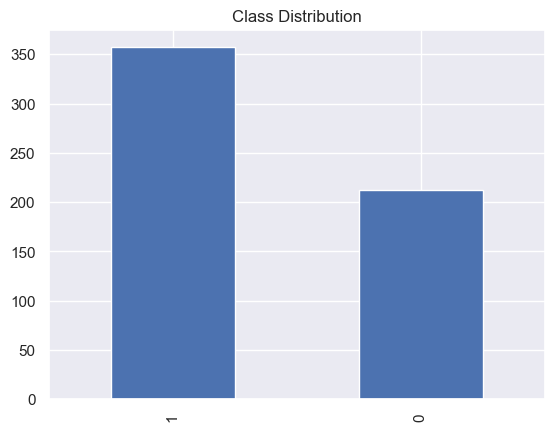

In [133]:
print(bc["target"].value_counts())
bc["target"].value_counts().plot(kind="bar")
plt.title("Class Distribution")

Since all features are numeric, we'll use SMOTE. If there are categorical data in your dataset you can use SMOTENC (check the docs for details, and many more sampling methods). SMOTE uses knn to find nearest neighbor, so it might be a good idea to normalize your data beforehand.
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [134]:
# SMOTE
smt = imblearn.over_sampling.SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=5)

# Min Max Normalization on the features (without target)
X = bc.drop("target", 1)
y = bc["target"]
features = X.columns

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns = features)
x_scaled.head(2)

C:\Users\ilyan\AppData\Local\Temp\ipykernel_73676\3796499726.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = bc.drop("target", 1)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878


In [135]:
# Fit smote
X_res, y_res = smt.fit_resample(x_scaled, y)

Check the distribution after oversampling with SMOTE


0    357
1    357
Name: target, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

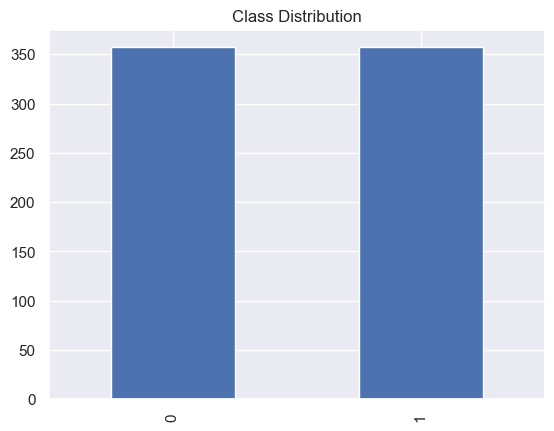

In [136]:
print(y_res.value_counts())
y_res.value_counts().plot(kind="bar")
plt.title("Class Distribution")

### Exercise
Use the `train` set of the BigMartSales data again for this exercise. <br>
Assume the `Item_type` as the target, use the `Item_Weight`, `Item_Visiblity`, and `Item_MRP` attributes with SMOTE to balance the distribution of the target.

Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64


Text(0.5, 1.0, 'Distribution of Item Type')

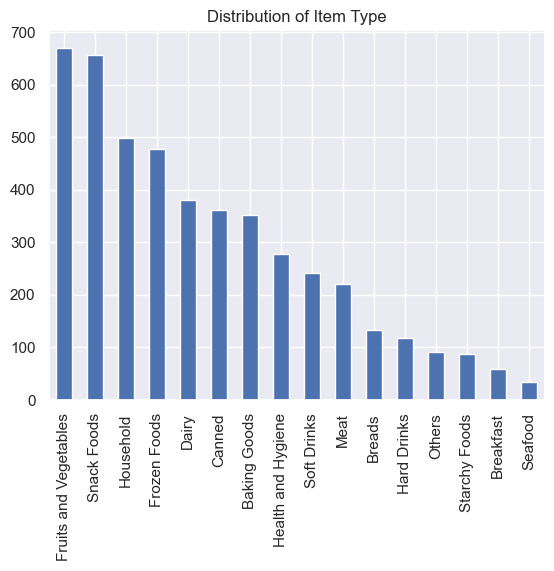

In [137]:
#Enter your codes here
#Step 1: check distribution of item type
#Step 2: Get numerical attributes -> item_weight, item_visibility, item_mrp -> x
#Step 3: Normalize the numerical attributes -> X_bms_scaled
#Step 4: initialize SMOTE
#Step 5: Fit data to SMOTE model
#Step 6: Check distribution of new Y
target_train = train_df['Item_Type']
print(target_train.value_counts())
target_train.value_counts().plot(kind='bar')
plt.title('Distribution of Item Type')

In [138]:
x_scaled_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.282525,0.085212,0.927446,0.359846
1,0.081274,0.102368,0.071280,0.036730
2,0.770765,0.088997,0.467837,0.199072
3,0.260494,0.000000,0.095036,0.090844
4,0.347723,0.000000,0.084583,0.047840
...,...,...,...,...
4645,0.964275,0.443954,0.625925,0.347428
4646,0.137541,0.301522,0.777541,0.265930
4647,0.359929,0.186840,0.227837,0.110320
4648,0.158083,0.771127,0.304349,0.174368


In [139]:
#x_scaled_train.drop('Item_Outlet_Sales',axis=1,inplace=True)
# SMOTE

# Min Max Normalization on the features (without target), this has been previously normalized
X_train = x_scaled_train
y_train = train_df['Item_Type']
features = X.columns
X_BMS, y_BMS = smt.fit_resample(X_train,y_train)
display(X_BMS)
display(y_BMS)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.282525,0.085212,0.927446,0.359846
1,0.081274,0.102368,0.071280,0.036730
2,0.770765,0.088997,0.467837,0.199072
3,0.260494,0.000000,0.095036,0.090844
4,0.347723,0.000000,0.084583,0.047840
...,...,...,...,...
5282,0.203334,0.114763,0.323975,0.186828
5283,0.386286,0.172955,0.442621,0.140136
5284,0.331163,0.161249,0.555951,0.152032
5285,0.170586,0.114744,0.656807,0.363073


0              Dairy
1        Soft Drinks
2               Meat
3          Household
4       Baking Goods
            ...     
5282         Seafood
5283         Seafood
5284         Seafood
5285         Seafood
5286         Seafood
Name: Item_Type, Length: 5287, dtype: object

Fruits and Vegetables    670
Seafood                  670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Name: Item_Type, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

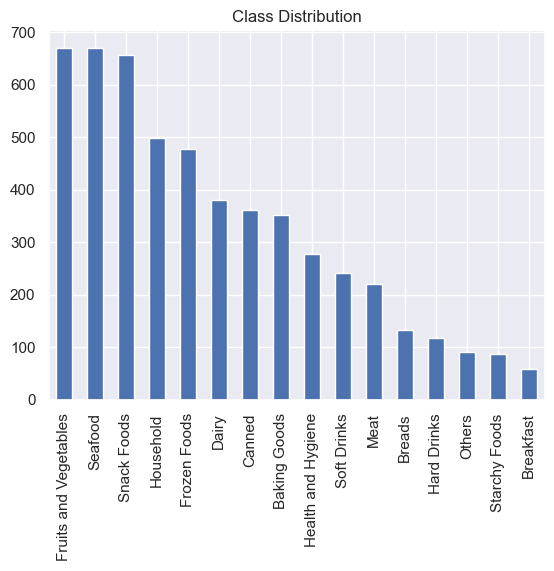

In [157]:
print(y_BMS.value_counts())
y_BMS.value_counts().plot(kind="bar")
plt.title("Class Distribution")

# Data Reduction
Data reduction can be achieved via various approaches, such as attribute selection, PCA, etc.

## Attribute Selection
For attribute selection, it is crucial to know what are the appropriate attributes to be selected / dropped. In this case, we can use the Chi-squared test to perform a correlation test and identify the best attributes.

Using the same set of data from the previous example of oversampling, let's try to select features:

In [141]:
from sklearn.feature_selection import chi2 # chi-squared test
from sklearn.feature_selection import SelectKBest

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [142]:
# Continue using variables from oversampling (X_res, y_res)
select_feature = SelectKBest(chi2, k=5).fit(X_res, y_res) # select top 5 features with chi-squared test

kbest = np.asarray(X_res.columns)[select_feature.get_support()]
kbest

array(['mean concavity', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'], dtype=object)

<Axes: xlabel='score', ylabel='Feature'>

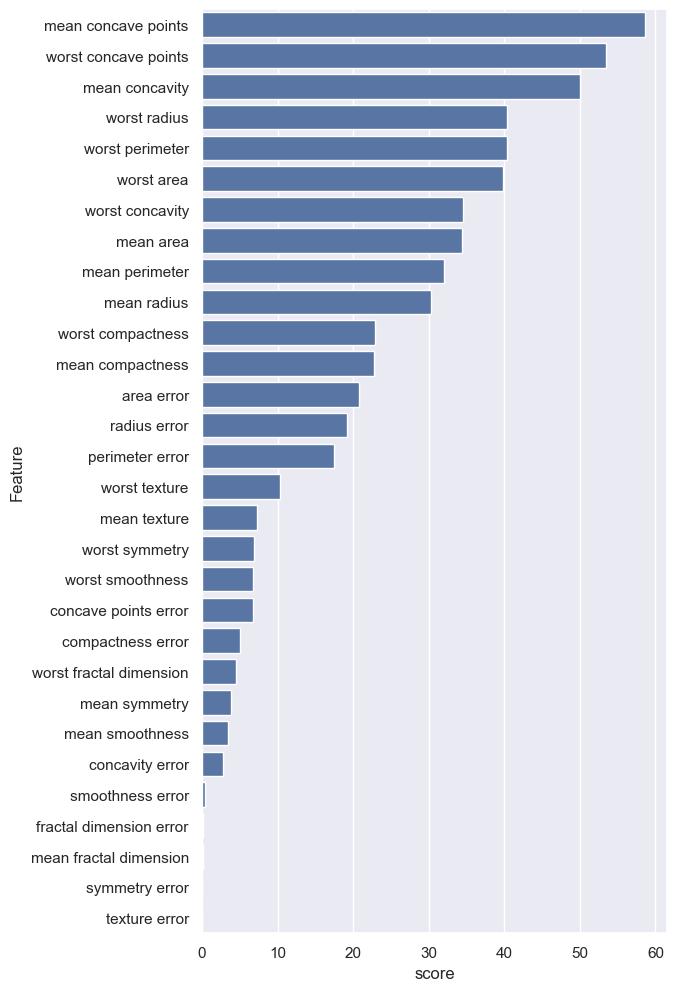

In [143]:
#Plot the scores used for the attribute selection
score = pd.DataFrame(select_feature.scores_ , X_res.columns).sort_values(0, ascending=False).reset_index().rename(columns={0:"score", "index":"Feature"})

f, ax = plt.subplots(figsize=(6, 12))

sns.barplot(data=score, x="score", y="Feature", color="b")

Alternatively, we can also use correlation to identify highly correlated attributes (redundancies) to be dropped from the dataset.


<Axes: >

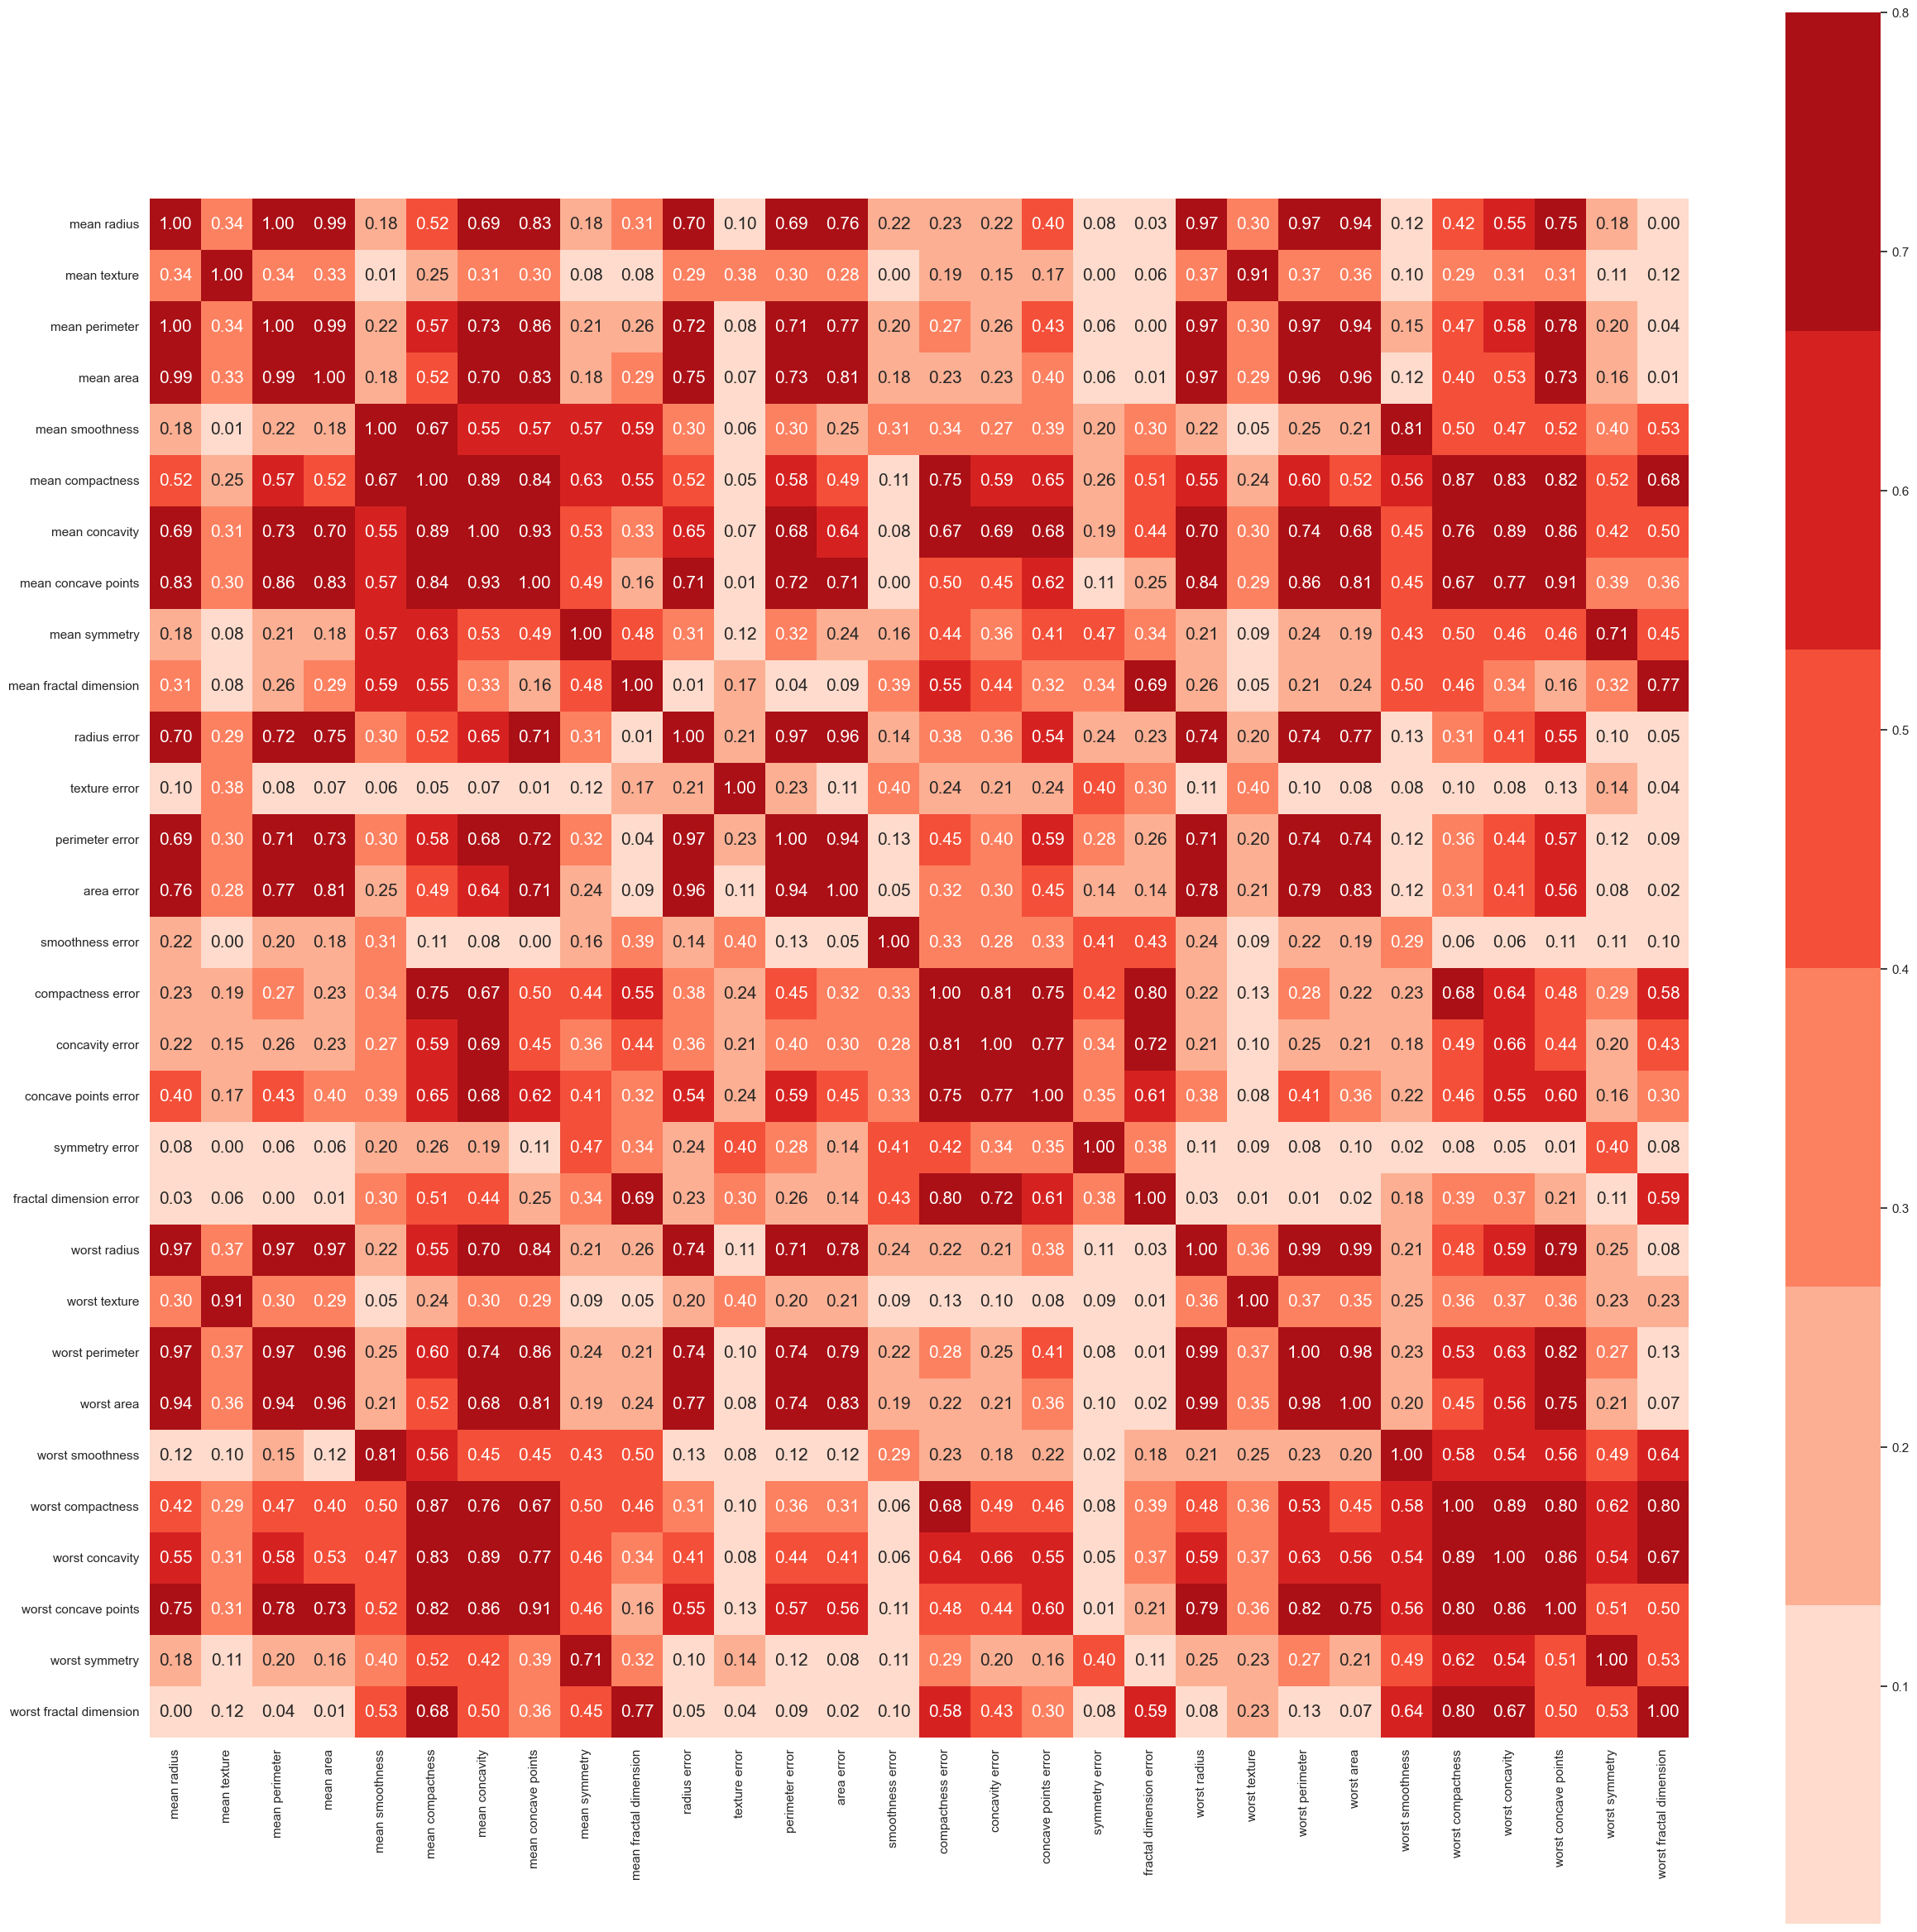

In [144]:
#Generate the correlation matrix
corr_matrix  = X_res.corr().abs()

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

In [145]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
display(to_drop)

['mean perimeter',
 'mean area',
 'perimeter error',
 'area error',
 'worst radius',
 'worst perimeter',
 'worst area']

## Principal Component Analysis (PCA)

Is one of the most popular technique for data reduction whereby it transforms columns into principal components that are ranked in order of strength of representation. Hence, we are able to select the most representative features for data mining.

Scikit-learn provides PCA functions as follows:

In [146]:
from sklearn.decomposition import PCA

In [147]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
print(pca.fit(X)) #fit the PCA model to the given data
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

PCA(n_components=2)
[0.99244289 0.00755711]
[6.30061232 0.54980396]


Let's try PCA on the example data from the previous example:

In [148]:
pca_res = PCA(n_components=len(X_res.columns))
pca_res.fit(X_res)
print(pca_res.explained_variance_ratio_)
print(pca_res.singular_values_)

[5.52867468e-01 1.69659285e-01 6.58738254e-02 6.19069598e-02
 3.55753792e-02 3.03188531e-02 1.55322181e-02 1.17503836e-02
 8.82117867e-03 8.62379265e-03 7.99598713e-03 7.01588387e-03
 5.89760308e-03 4.09698080e-03 2.55847796e-03 2.35948325e-03
 1.77506286e-03 1.46307021e-03 1.27426591e-03 1.00229101e-03
 8.99573458e-04 7.49605118e-04 4.91321538e-04 4.57875207e-04
 4.34496937e-04 3.29553494e-04 1.80065499e-04 5.47518284e-05
 2.80471284e-05 6.26043048e-06]
[15.71697657  8.70657416  5.42518972  5.25930341  3.98688085  3.68056822
  2.63436063  2.29131348  1.98528014  1.96294278  1.89014243  1.7705153
  1.62329054  1.35297712  1.06917631  1.02675526  0.89056445  0.80852057
  0.75455086  0.66919919  0.63398182  0.57872835  0.4685343   0.45230569
  0.44060746  0.3837262   0.28364409  0.15640758  0.11194448  0.05288842]


In [149]:
X_res_PCA = pca_res.fit_transform(X_res) #use the PCA model to transform the whole dataset attributes
columns = []
for i in range(len(X_res.columns)):
  columns.append('PC'+str(i+1))
X_res_PCA = pd.DataFrame(X_res_PCA, columns = columns)
display(X_res_PCA)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,1.271382,0.487107,-0.520845,-0.131003,-0.067140,0.152121,0.258750,-0.013076,-0.058627,0.145812,...,0.048795,0.002927,0.005785,0.007542,0.019752,-0.000391,0.039522,-0.005109,0.004708,-0.007921
1,0.371923,-0.528600,-0.167627,-0.121334,0.016432,0.010849,0.043341,0.052977,0.102165,-0.086637,...,-0.014009,0.009619,-0.018041,-0.035220,0.018844,-0.008176,-0.015422,0.004087,-0.000302,-0.000314
2,0.849760,-0.061500,-0.133670,-0.052584,-0.029766,0.060495,-0.107480,0.012563,0.081664,-0.047085,...,-0.017614,0.019655,0.007102,0.001825,-0.014183,-0.017923,-0.004215,0.003914,0.000683,0.000427
3,0.846634,1.581609,0.007124,-0.161625,-0.211613,0.365511,0.197209,0.177460,-0.121882,-0.126512,...,-0.021678,0.009112,0.013592,-0.043945,0.017715,-0.051080,-0.013960,0.003498,-0.010961,-0.003595
4,0.530795,-0.274916,-0.459308,0.067742,0.002391,-0.172945,-0.073324,0.031729,-0.039809,-0.004639,...,0.003032,-0.004944,-0.001910,0.009809,0.004598,0.007145,-0.006138,-0.003345,0.000793,0.003450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,-0.008788,0.133833,-0.102467,-0.150649,-0.051123,-0.004376,-0.043716,0.021591,0.020739,0.009384,...,0.009416,0.016826,0.005897,-0.001209,-0.007343,-0.009680,-0.003835,-0.004586,-0.002487,0.001194
710,0.396435,-0.154675,-0.115150,0.010338,-0.137639,-0.005166,0.034159,-0.127794,-0.061684,-0.005562,...,0.001971,-0.005392,-0.004511,-0.010747,-0.014093,-0.009766,0.006521,-0.005888,0.002148,0.000384
711,0.626067,-0.338693,-0.063384,0.343812,0.014980,0.046844,-0.234040,0.092375,0.025306,-0.013833,...,-0.037537,0.015597,-0.007495,0.027010,0.006602,0.004534,-0.005374,0.003213,-0.004472,-0.006170
712,0.238628,-0.067998,-0.040078,-0.164006,-0.090463,-0.077901,-0.082352,-0.046929,0.027821,0.035049,...,0.001259,0.003043,-0.008237,-0.005689,0.002447,0.001934,0.001853,0.006792,-0.004575,0.001009


The numerical values of the PCA may not be immediately understood. Therefore, we can do an experiment using the PCs generated to train a Linear Regression model and predict the output, and then compare to another Linear Regression model, trained using only the normalized+balanced data (`X_res`).

Try the following codes:

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
#simple linear regression for reference
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]]) #attributes
y = np.dot(X, np.array([1, 2])) + 3 #numerical outputs
reg = LinearRegression().fit(X, y) #initialize and train linear regression
print(reg.score(X, y)) #evaluate the model
reg.coef_ #coefficients of the regression model
reg.intercept_ #intercept of the model
reg.predict(np.array([[3, 5]])) #predict single sample

1.0


array([16.])

In [151]:
#alternative evaluation methods
predictions = reg.predict(X)
print('mean_squared_error : ', mean_squared_error(y, predictions))
print('mean_absolute_error : ', mean_absolute_error(y, predictions))

mean_squared_error :  0.0
mean_absolute_error :  0.0


Train regression model using the normalized+balanced data:

In [152]:
reg_norm_data = LinearRegression().fit(X_res,y_res)
reg_norm_score = reg_norm_data.score(X_res,y_res)
reg_norm_pred = reg_norm_data.predict(X_res)
print(reg_norm_score)
print('mean_squared_error : ', mean_squared_error(y_res, reg_norm_pred))
print('mean_absolute_error : ', mean_absolute_error(y_res, reg_norm_pred))

0.7728409905656486
mean_squared_error :  0.05678975235858785
mean_absolute_error :  0.19278535774439504


Train regression model using PCA+balanced data:

In [153]:
PC = 5 #change this parameter to choose how many PC to use for training.
# Observer the changees to the evaluation results then compare with the results
# using only the normalized data
reg_pca_data = LinearRegression().fit(X_res_PCA.iloc[:,:PC],y_res)
reg_pca_score = reg_pca_data.score(X_res_PCA.iloc[:,:PC],y_res)
reg_pca_pred = reg_pca_data.predict(X_res_PCA.iloc[:,:PC])
print(reg_pca_score)
print('mean_squared_error : ', mean_squared_error(y_res, reg_pca_pred))
print('mean_absolute_error : ', mean_absolute_error(y_res, reg_pca_pred))

0.7002011313049061
mean_squared_error :  0.07494971717377348
mean_absolute_error :  0.22408580540484238


### Exercise
Apply PCA on the normalized `train` set of the BigMartSales dataset, then repeat the previous experiment.<br>
Reference steps:
1. Extract the numerical attributes from the BigMartSales `train` set
2. Normalize the numerical attributes
3. Separate the target attributes (`Item_Outlet_Sales`) with the other attributes into their own variables
4. Apply PCA on the other attributes
5. Train a Linear Regression Model using the normalized data attributes to predict the `Item_Outlet_Sales`, and evaluate the results
6. Train a Linear Regression Model using the PCA data attibutes (adjust the number of PCs as you see fit) to predict the `Item_Outlet_sales` and evaluate the results
7. Compare and comment on the results
